# Eurybia with custom colors

<b>With this tutorial, you will understand how to manipulate colors with Eurybia plots</b>

Contents:
- Compile Eurybia SmartDrift
- Use `palette_name` parameter
- Use `colors_dict` parameter
- Change the colors after compiling SmartDrift

Data from Kaggle [House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

**Requirements notice** : the following tutorial may use third party modules not included in Eurybia.  
You can find them all in one file [on our Github repository](https://github.com/MAIF/eurybia/blob/master/requirements.dev.txt) or you can manually install those you are missing, if any.

In [1]:
import pandas as pd
from category_encoders import OrdinalEncoder
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

## Building a Supervized Model

In [3]:
from eurybia.data.data_loader import data_loading
house_df, house_dict = data_loading('house_prices')

/Users/78176D/workspace/eurybia/eurybia/report/generation.py:18: UserWarning:

Using Panel interactively in VSCode notebooks requires the jupyter_bokeh package to be installed. You can install it with:

   pip install jupyter_bokeh

or:
    conda install jupyter_bokeh

and try again.



In [4]:
#For the purpose of this tutorial and to better represent a common use case of Eurybia, 
#the house_prices dataset was split in two smaller sets : "training" and "production"
# To see an interesting analysis, let's test for a bias in the date of construction of training and production dataset
house_df_learning = house_df.loc[house_df['YearBuilt'] < 1980]
house_df_production = house_df.loc[house_df['YearBuilt'] >= 1980]

In [5]:
y_df_learning=house_df_learning['SalePrice'].to_frame()
X_df_learning=house_df_learning[house_df_learning.columns.difference(['SalePrice','YearBuilt'])]

y_df_production=house_df_production['SalePrice'].to_frame()
X_df_production=house_df_production[house_df_production.columns.difference(['SalePrice','YearBuilt'])]

In [6]:
from eurybia import SmartDrift

In [7]:
SD = SmartDrift(df_current=X_df_production, df_baseline=X_df_learning)

In [8]:
%time SD.compile(full_validation=True)

The variable BldgType has mismatching unique values:
[] | ['Two-family Conversion; originally built as one-family dwelling']

The variable BsmtCond has mismatching unique values:
[] | ['Poor -Severe cracking, settling, or wetness']

The variable CentralAir has mismatching unique values:
[] | ['No']

The variable Condition1 has mismatching unique values:
["Within 200' of East-West Railroad"] | ['Adjacent to arterial street', 'Adjacent to postive off-site feature']

The variable Condition2 has mismatching unique values:
['Near positive off-site feature--park, greenbelt, etc.'] | ['Adjacent to arterial street', "Within 200' of North-South Railroad", 'Adjacent to feeder street', 'Adjacent to postive off-site feature', 'Adjacent to North-South Railroad', 'Adjacent to East-West Railroad']

The variable Electrical has mismatching unique values:
[] | ['60 AMP Fuse Box and mostly Romex wiring (Fair)', 'Fuse Box over 60 AMP and all Romex wiring (Average)', '60 AMP Fuse Box and mostly knob & tube

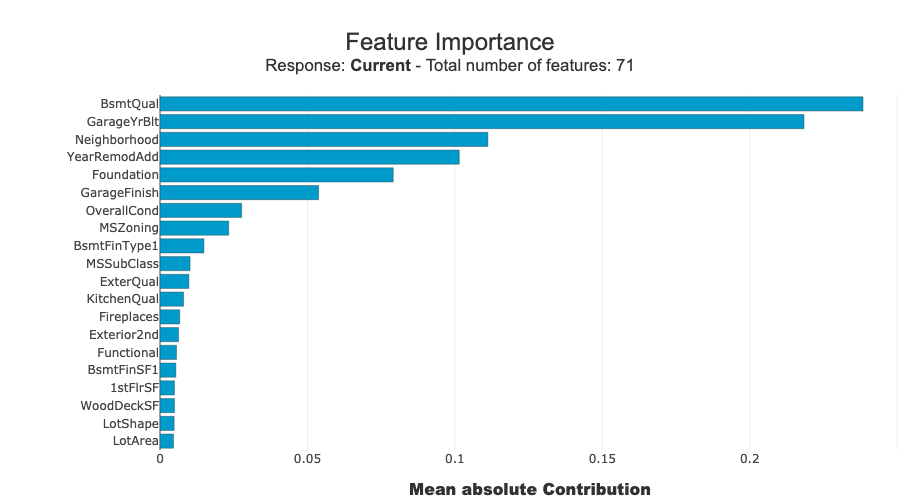

In [ ]:
SD.xpl.plot.features_importance()

## Eurybia with different colors

### Option 1 : define user-specific colors with `colors_dict` parameter

The colors declared will replace the one in the default palette.

In the example below, we replace the colors used in the features importance bar plot:

In [11]:
# first, let's print the colors used in the previous explainer: 
SD.colors_dict['featureimp_bar']

{'1': 'rgba(0, 154, 203, 1)',
 '2': 'rgba(223, 103, 0, 0.8)',
 '3': 'rgba(240, 195, 162, 0.8)',
 '4': 'rgba(245, 122, 0, 0.8)'}

In [12]:
# Now we replace these colors using the colors_dict parameter
SD2 = SmartDrift(df_current=X_df_production, df_baseline=X_df_learning,
    colors_dict=dict(
        featureimp_bar={
            "1": "rgba(244, 192, 0, 1.0)",
            "2": "rgba(52, 192, 54, 0.7)",
            "3": "rgba(192, 55, 54, 0.7)",
            "4": "rgba(52, 55, 54, 0.7)"
            },
            univariate_cat_bar={
            "1": "rgba(244, 192, 0, 1.0)",
            "2": "rgba(52, 55, 54, 0.7)"
            },
            univariate_cont_bar={
            "1": "rgba(244, 192, 0, 1.0)",
            "2": "rgba(52, 55, 54, 0.7)"      
            })
                )

In [13]:
%time SD2.compile(full_validation=True)

The variable BldgType has mismatching unique values:
[] | ['Two-family Conversion; originally built as one-family dwelling']

The variable BsmtCond has mismatching unique values:
[] | ['Poor -Severe cracking, settling, or wetness']

The variable CentralAir has mismatching unique values:
[] | ['No']

The variable Condition1 has mismatching unique values:
["Within 200' of East-West Railroad"] | ['Adjacent to arterial street', 'Adjacent to postive off-site feature']

The variable Condition2 has mismatching unique values:
['Near positive off-site feature--park, greenbelt, etc.'] | ['Adjacent to arterial street', "Within 200' of North-South Railroad", 'Adjacent to feeder street', 'Adjacent to postive off-site feature', 'Adjacent to North-South Railroad', 'Adjacent to East-West Railroad']

The variable Electrical has mismatching unique values:
[] | ['60 AMP Fuse Box and mostly Romex wiring (Fair)', 'Fuse Box over 60 AMP and all Romex wiring (Average)', '60 AMP Fuse Box and mostly knob & tube

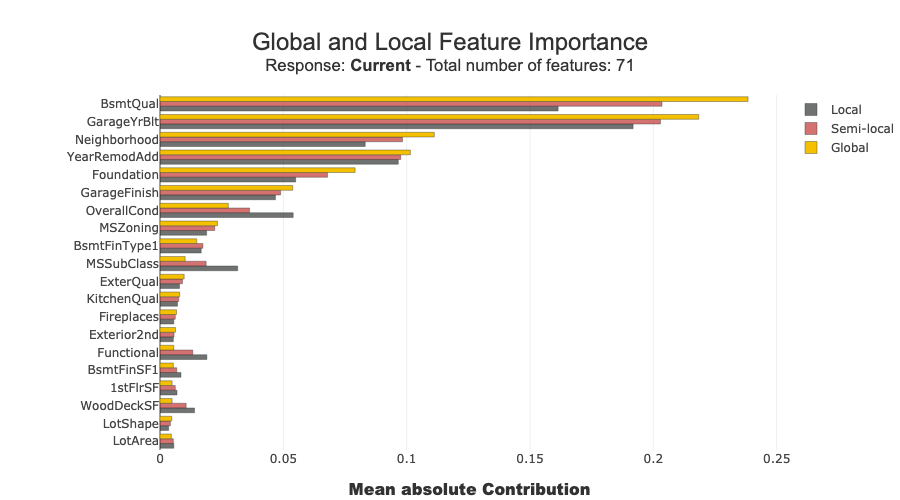

In [ ]:
SD2.xpl.plot.features_importance(mode="global-local")

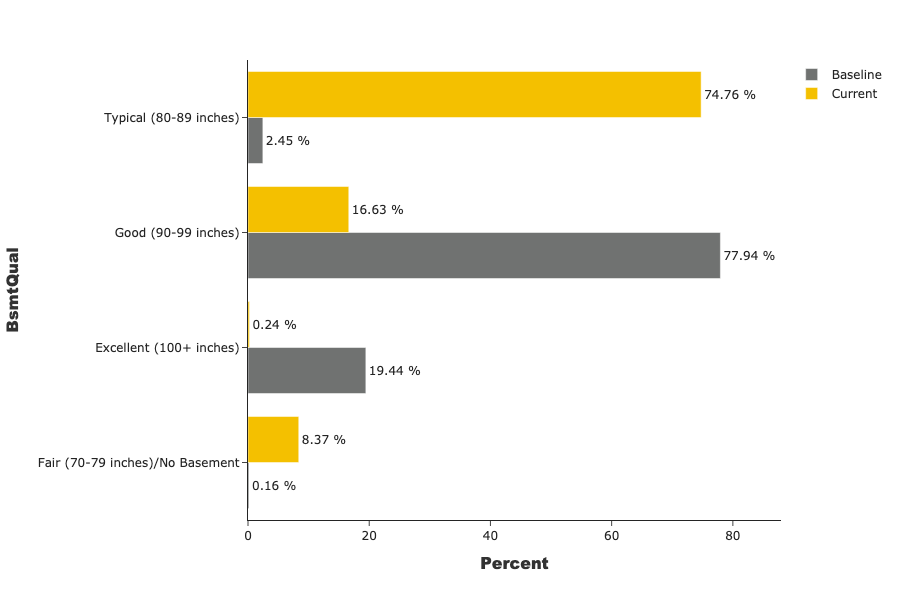

In [ ]:
SD2.plot.generate_fig_univariate('BsmtQual')

### Option 2 : redefine colors after compiling Eurybia

In [17]:
SD3 = SmartDrift(df_current=X_df_production, df_baseline=X_df_learning)

In [18]:
%time SD3.compile(full_validation=True)

The variable BldgType has mismatching unique values:
[] | ['Two-family Conversion; originally built as one-family dwelling']

The variable BsmtCond has mismatching unique values:
[] | ['Poor -Severe cracking, settling, or wetness']

The variable CentralAir has mismatching unique values:
[] | ['No']

The variable Condition1 has mismatching unique values:
["Within 200' of East-West Railroad"] | ['Adjacent to arterial street', 'Adjacent to postive off-site feature']

The variable Condition2 has mismatching unique values:
['Near positive off-site feature--park, greenbelt, etc.'] | ['Adjacent to arterial street', "Within 200' of North-South Railroad", 'Adjacent to feeder street', 'Adjacent to postive off-site feature', 'Adjacent to North-South Railroad', 'Adjacent to East-West Railroad']

The variable Electrical has mismatching unique values:
[] | ['60 AMP Fuse Box and mostly Romex wiring (Fair)', 'Fuse Box over 60 AMP and all Romex wiring (Average)', '60 AMP Fuse Box and mostly knob & tube

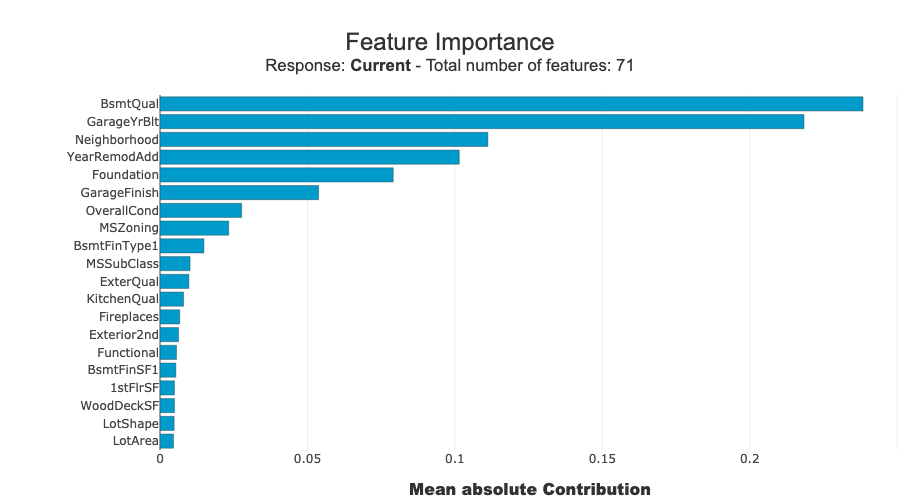

In [ ]:
SD3.xpl.plot.features_importance()

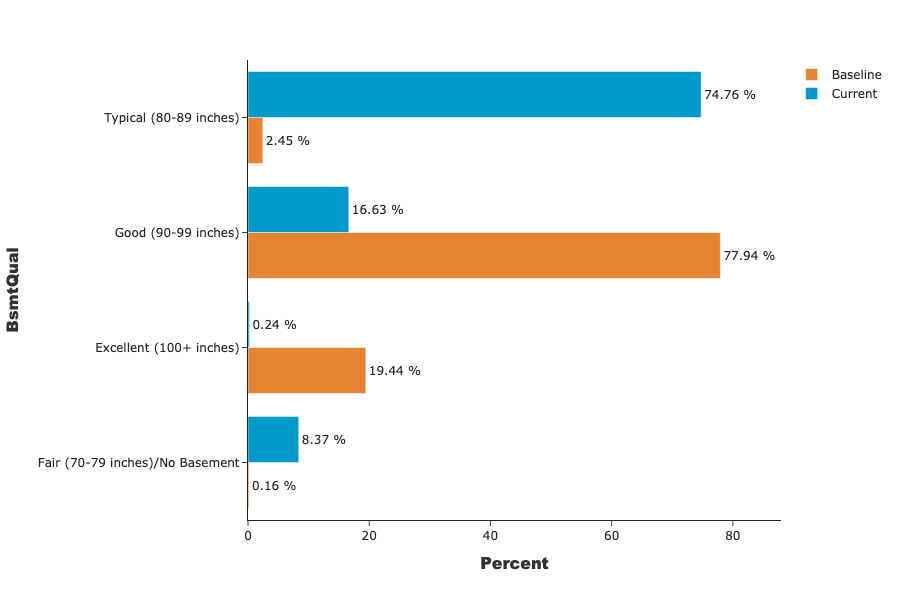

In [ ]:
SD3.plot.generate_fig_univariate('BsmtQual')